In [7]:
from IPython.display import Image
import os
import numpy as np
import pandas as pd

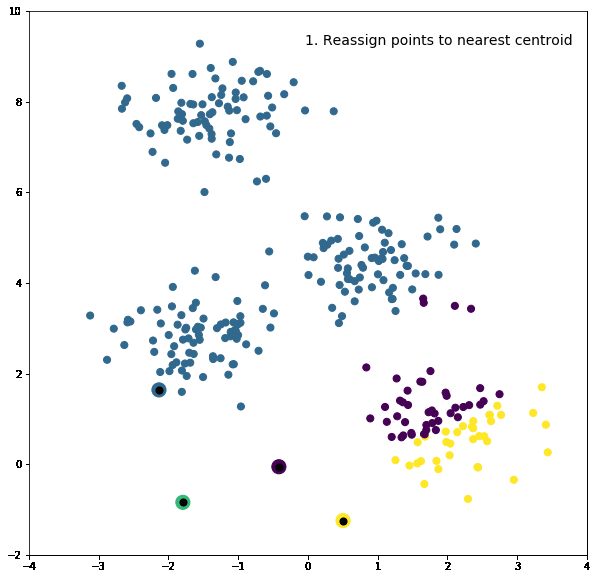

In [26]:
gif_path = os.path.join('Visuals', 'kmeans_gif.gif')
Image(gif_path)

# Python Basics to Implement K-Means

## Loops

Two of the most common loops used in Python are `while` loop and `for` loop. While you may use these two loop structures interchangably at times, you should note one key distinction between the two: **`while` loop is more applicable when you don't know beforehand exactly how many iterations you loop will run**. Also, if you are constructing a `while` loop, you should make sure that `while` loop has proper stop/break condition, else you would run into the **infinite loop**.

```python
for i in range(x):
    # do something
    ...

while True:
    if stop_condition is True:
        break
    # do something
    else:
        ...
```

In [25]:
# infinite loop demo
# don't try this at home
# you can uncomment the two lines below to see the nightmare

# while True:
#     print('Oops')

## Functions

Defining a function allows you to encapsulate your code in a kneat format that allows much programming convenience. One of the more obvious advantages of defining functions is that you can repeated pass in parameters and execute the function to perform diverse variations of a task without duplicating and stacking up redundant, lengthy code.<br>
Before we dive deeper with Python, we should situate ourselves with this central piece of programming functionality. Below is what a typical Python function looks like:<br>

```python
def <function name>(<function signature>):
    """ documentation string """
    <encapsulated code>
    return <object>

# Or more concretely
def do_something_xyz(input_a: datatype_i, input_b: datatype_j, input_c: datatype_k):
    """Take the mean?"""
    abc_sum = input_a + input_b + input_c
    return abc_sum / 3
```
- `def` signifies the **def**inition of a function. It is a reserved word in Python language, hence why it is bolded in green. You should avoid assigning `def` to any other variable or value.
- `<function name>` is the name of your function, quite self-explanatory, just like a variable name.
- `<function signature>` includes the parameters your function take in as inputs.
- `<encapsulated code>` implements what your function aims to achieve, ex. summation, subtraction, etc.
- `object` is returned and the function call terminates.

In [ ]:
def finding_distance(x, y):
    return ...

## Conditional

```python
If True is True ?
If True is not True?
If False is True?
```

In [27]:
# Incorporating conditionals with while loop
starting_number = 100
is_below_zero = False
while True:
    if is_below_zero:
        break
    starting_number -= 10
    is_below_zero = starting_number < 0
print(starting_number)

-10


## Taking Means

Suppose I give you a N $\times$ D dimension array of numbers, how would you find the mean along each dimension/column?

In [8]:
# What does a N * D dimension array look like?
arr = np.ones((10, 5))
arr

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

What do you observe from above?<br>
You may say you are seeing a matrix of 1's.<br>
You may further say that the matrix has 10 rows and 5 columns.<br>

The number of rows and the number of columns are exactly what we mean when we say a N * D dimension array. But why don't we say it as a N * D matrix but use the term **array** instead? It is because we can view each row of the matrix as an individual element of the array--so now we have an array of rows. Each row in turn is an array, containing D elements where D equates to the number of columns. Hence a matrix can be seen as an array of arrays.<br>
Viewing matrices as arrays makes it convenient for us to work with Python's `numpy` package, whose underlying data structure is called `np.ndarray`.<br>
```python
>>> arr = np.ones((10, 5))
>>> type(arr)
numpy.ndarray
>>> arr.shape
(10, 5)
```
The `.shape` attribute of a `numpy.ndarray` object allows us to see the N and the D of that array.

In [11]:
random_integer_mat = np.random.randint(0, 10, size=(10, 5))
random_integer_mat

array([[0, 5, 5, 7, 2],
       [7, 1, 6, 4, 0],
       [5, 2, 9, 7, 6],
       [6, 4, 9, 9, 5],
       [8, 6, 1, 2, 4],
       [5, 6, 0, 2, 5],
       [1, 9, 2, 4, 1],
       [0, 3, 8, 8, 0],
       [5, 8, 1, 2, 7],
       [1, 8, 2, 3, 8]])

How can you take the mean along each column of the above matrix?<br>

You may say "run a for loop", or "run two for loops"!<br>

Even though for loops are great, we don't want to use them all the time since they can slow down our program, especially when they are nested.<br>
Turns out, the almighty `numpy` package has many powerful functions implemented and optimized for us, one of which can be of great help here, and it is `np.mean()`

In [16]:
?np.mean

Signature:
np.mean(
    a,
    axis=None,
    dtype=None,
    out=None,
    keepdims=<no value>,
    *,
    where=<no value>,
)
Docstring:
Compute the arithmetic mean along the specified axis.

Returns the average of the array elements.  The average is taken over
the flattened array by default, otherwise over the specified axis.
`float64` intermediate and return values are used for integer inputs.

Parameters
----------
a : array_like
    Array containing numbers whose mean is desired. If `a` is not an
    array, a conversion is attempted.
axis : None or int or tuple of ints, optional
    Axis or axes along which the means are computed. The default is to
    compute the mean of the flattened array.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a mean is performed over multiple axes,
    instead of a single axis or all the axes as before.
dtype : data-type, optional
    Type to use in computing the mean.  For integer inputs, the default
    is `float64`; for floating poi

What does it mean "the defult is to compute the mean of the flattened array"? Let's take a look:

In [18]:
np.mean(random_integer_mat)

4.38

What does flattened `random_integer_mat` look like?

In [19]:
random_integer_mat.flatten()

array([0, 5, 5, 7, 2, 7, 1, 6, 4, 0, 5, 2, 9, 7, 6, 6, 4, 9, 9, 5, 8, 6,
       1, 2, 4, 5, 6, 0, 2, 5, 1, 9, 2, 4, 1, 0, 3, 8, 8, 0, 5, 8, 1, 2,
       7, 1, 8, 2, 3, 8])

In [20]:
np.mean(random_integer_mat.flatten())

4.38

Seems like we can't just throw our arguments in and expect the correct output. Let's try adding something using the `axis` keyword argument.

In [21]:
np.mean(random_integer_mat, axis=0)

array([3.8, 5.2, 4.3, 4.8, 3.8])

`axis=0` allows us to calculate means along the axis of rows (to each column essentially). I know `axis of rows` sounds confusing, here is a clearer schematic breakdown:<br>
![title](Visuals/table_demo.jpeg)<br>
Hence, conversely, setting `axis=1` would allow us to apply calculations along the axis of columns (to each row).

In [22]:
np.mean(random_integer_mat, axis=1)

array([3.8, 3.6, 5.8, 6.6, 4.2, 3.6, 3.4, 3.8, 4.6, 4.4])

## K-Means

Believe it or not, we know are equipped with all the essential tools we need to implement a K-Means algorithm and get it running. Let's get down to it.<br>

Below are the general steps of constructing K-Means algorithm:
1. Initialize cluster centroids
2. Assign each point to a cluster
3. Update cluster centroids
4. Repeat step (2) and subsequently step (3)

# Competition